****Columns Property Annotation using DBpedia (R2-SOTAB-CPA-DBP)****

1. Task Description:
    - This task is part of the "Semantic Web Challenge on Tabular Data to Knowledge Graph Matching" in ISWC 2023.
    - It is based on the WDC-SOTAB benchmark.
    - The goal is to annotate the relationship between the main column of a table and other columns using pre-defined terms from DBpedia.
    - It is a multi-class classification problem where each column pair can be annotated with only one label.
    - The set of pre-defined DBpedia terms consists of **49** terms listed in the "cpa_labels_round2_dbpedia.txt" file.
2. Annotation Instructions:
    - Annotate the relationship between the main column and other columns using terms from the "cpa_labels_round2_dbpedia.txt" file.
    - Prepare a CSV file for submission, where each line represents a relationship prediction.
    - The columns in the CSV should be named as follows: "table_name", "main_column_index", "column_index", "label".
    - The "table_name" column should include the full name of the table, including the extension (e.g., Product_corememoriesco.com_September2020_CPA.json.gz).
    - The "main_column_index" refers to the position of the main column in the table. Main column indices in the WDC-SOTAB benchmark are always at index 0.
    - The "column_index" refers to the position of the other column in the table, starting from index 1.
    - The "label" refers to the predicted label, and each column pair should have only one predicted label.
3. Dataset and Files:
    - The necessary datasets and files can be found in the provided links.
    - The training set is available in the "sotab_cpa_train_round2_dbpedia.csv" file, which provides the table names, main column indices, column indices, and ground truth labels for each column pair.
    - The validation set is in the "sotab_cpa_validation_round2_dbpedia.csv" file, having the same structure as the training set.
    - To evaluate predictions on the validation set, you can use the "SOTAB_Evaluator.py" script with the command: **`python SOTAB_Evaluator.py /path/to/submission/file /path/to/ground/truth/file`**.
    - The test targets are provided in the "sotab_cpa_test_targets_round2_dbpedia.csv" file, which includes the table name, index of the main column, and the target column index.
    - All tables are stored in JSON files, where each line corresponds to a row in the table. Use the code snippet **`table_df = pd.read_json(path, compression='gzip', lines=True)`** to open a table.
    - The label set for prediction is stored in the "cpa_labels_round2_dbpedia.txt" file.

In [1]:
import pandas as pd
import gzip
import json
import matplotlib.pyplot as plt
import os

In [2]:
# Read all 80 terms provided in cta_labels_round2.txt
file_path_terms = 'dataset\Round2-SOTAB-CPA-DBP-Datasets\cpa_labels_round2_dbpedia.txt'

with open(file_path_terms, 'r') as file:
    lines = file.readlines()

print(lines)

print(f'\n Totle number of terms in cpa_labels_round2.txt are : {len(lines)}')

['https://dbpedia.org/ontology/publicationDate\n', 'https://dbpedia.org/ontology/price\n', 'https://dbpedia.org/ontology/language\n', 'https://dbpedia.org/ontology/currency\n', 'https://dbpedia.org/ontology/publisher\n', 'https://dbpedia.org/ontology/author\n', 'https://dbpedia.org/ontology/numberOfPages\n', 'https://dbpedia.org/ontology/isbn\n', 'https://dbpedia.org/ontology/format\n', 'https://dbpedia.org/ontology/genre\n', 'https://dbpedia.org/ontology/review\n', 'https://dbpedia.org/ontology/rating\n', 'https://dbpedia.org/ontology/image\n', 'https://dbpedia.org/ontology/description\n', 'https://dbpedia.org/ontology/startDateTime\n', 'https://dbpedia.org/ontology/endDateTime\n', 'https://dbpedia.org/ontology/locationName\n', 'https://dbpedia.org/ontology/performer\n', 'https://dbpedia.org/ontology/address\n', 'https://dbpedia.org/ontology/category\n', 'https://dbpedia.org/ontology/albumRuntime\n', 'https://dbpedia.org/ontology/time\n', 'https://dbpedia.org/ontology/city\n', 'https:

In [3]:
# Read a sample file and sources residing in it : File name and data residing in it. 
file_path_gz = 'dataset/Round2-SOTAB-CPA-Tables/Round2-SOTAB-CPA-Tables/Book_11x17.pt_September2020_CPA.json.gz'  # Replace with the actual file path of your JSON file
df = pd.read_json(file_path_gz, lines=True, compression='gzip')

In [4]:
df.head()

,0,1,2,3
0,A Cidade Perdida,9789722539739,728,2020-07-10
1,A Cúpula - livro 1,9789722531924,704,2016-04-08
2,Misery,9789722527118,480,2013-09-13
3,A Cúpula - Livro 2,9789722532457,656,2016-08-05
4,O Olho de Deus,9789722537636,528,2019-05-10


In [5]:
# Reading the provided training, validation, and testing dataset
file_path_train = 'dataset\Round2-SOTAB-CPA-DBP-Datasets\sotab_cpa_train_round2_dbpedia.csv'
file_path_validate = 'dataset\Round2-SOTAB-CPA-DBP-Datasets\sotab_cpa_validation_round2_dbpedia.csv' 
file_path_test = 'dataset\Round2-SOTAB-CPA-DBP-Datasets\sotab_cpa_test_targets_round2_dbpedia.csv'

df_train = pd.read_csv(file_path_train)
df_validate = pd.read_csv(file_path_validate)
df_test = pd.read_csv(file_path_test)

print(f'\n Dimension of the train dataframe are {df_train.shape}')
print(f'\n Dimension of the validaiton dataframe are {df_validate.shape}')
print(f'\n Dimension of the test dataframe are {df_test.shape}')


 Dimension of the train dataframe are (62128, 4)

 Dimension of the validaiton dataframe are (1020, 4)

 Dimension of the test dataframe are (904, 3)


In [6]:
print('Training dataset')
df_train.head()

Training dataset


,table_name,main_column_index,column_index,label
0,Book_11x17.pt_September2020_CPA.json.gz,0,3,https://dbpedia.org/ontology/publicationDate
1,Book_11x17.pt_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/isbn
2,Book_11x17.pt_September2020_CPA.json.gz,0,2,https://dbpedia.org/ontology/numberOfPages
3,Book_1jour-1jeu.com_September2020_CPA.json.gz,0,5,https://dbpedia.org/ontology/publicationDate
4,Book_1jour-1jeu.com_September2020_CPA.json.gz,0,6,https://dbpedia.org/ontology/currency


In [7]:
print('Validaiton dataset')
df_validate.head()

Validaiton dataset


,table_name,main_column_index,column_index,label
0,Book_7sat.co.uk_September2020_CPA.json.gz,0,9,https://dbpedia.org/ontology/author
1,Book_7sat.co.uk_September2020_CPA.json.gz,0,2,https://dbpedia.org/ontology/format
2,Book_7sat.co.uk_September2020_CPA.json.gz,0,3,https://dbpedia.org/ontology/publicationDate
3,Book_7sat.co.uk_September2020_CPA.json.gz,0,4,https://dbpedia.org/ontology/numberOfPages
4,Book_7sat.co.uk_September2020_CPA.json.gz,0,5,https://dbpedia.org/ontology/isbn


In [8]:
print('Test dataset')
df_test.head()

Test dataset


,table_name,main_column_index,column_index
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3
1,Book_bccampus.ca_September2020_CPA.json.gz,0,4
2,Book_bccampus.ca_September2020_CPA.json.gz,0,2
3,Book_betweenthecovers.com_September2020_CPA.js...,0,4
4,Book_betweenthecovers.com_September2020_CPA.js...,0,2


### Functional Data Analysis (FDA) on Train dataset

In [9]:
# Look at the head of the train dataset
df_train.head()

,table_name,main_column_index,column_index,label
0,Book_11x17.pt_September2020_CPA.json.gz,0,3,https://dbpedia.org/ontology/publicationDate
1,Book_11x17.pt_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/isbn
2,Book_11x17.pt_September2020_CPA.json.gz,0,2,https://dbpedia.org/ontology/numberOfPages
3,Book_1jour-1jeu.com_September2020_CPA.json.gz,0,5,https://dbpedia.org/ontology/publicationDate
4,Book_1jour-1jeu.com_September2020_CPA.json.gz,0,6,https://dbpedia.org/ontology/currency


In [10]:
print(f"Total number of samples in dataset are: {df_train.size}")
print(f"Total number of unique tables present in training dataset: {df_train['table_name'].nunique()}")
print(f"Total number of unique labels present in training dataset: {df_train['label'].nunique()}")

# print(f'Highest number of column idex is: {df_train["column_index"].max}')

Total number of samples in dataset are: 248512
Total number of unique tables present in training dataset: 22905
Total number of unique labels present in training dataset: 49


In [11]:
df_train['column_index'].max()

28

In [12]:
# Maximum number of column_index a table can have
maximum_no_of_column_by_table = df_train.groupby('table_name')['column_index'].max() + 1

In [13]:
maximum_no_of_column_by_table_to_df = maximum_no_of_column_by_table.reset_index()

In [14]:
maximum_no_of_column_by_table_to_df.head()

,table_name,column_index
0,Book_11x17.pt_September2020_CPA.json.gz,4
1,Book_1jour-1jeu.com_September2020_CPA.json.gz,7
2,Book_2014brazil.co.uk_September2020_CPA.json.gz,10
3,Book_24symbols.com_September2020_CPA.json.gz,6
4,Book_4thestate.co.uk_September2020_CPA.json.gz,7


In [15]:
value_counts = maximum_no_of_column_by_table_to_df['column_index'].value_counts().sort_index()

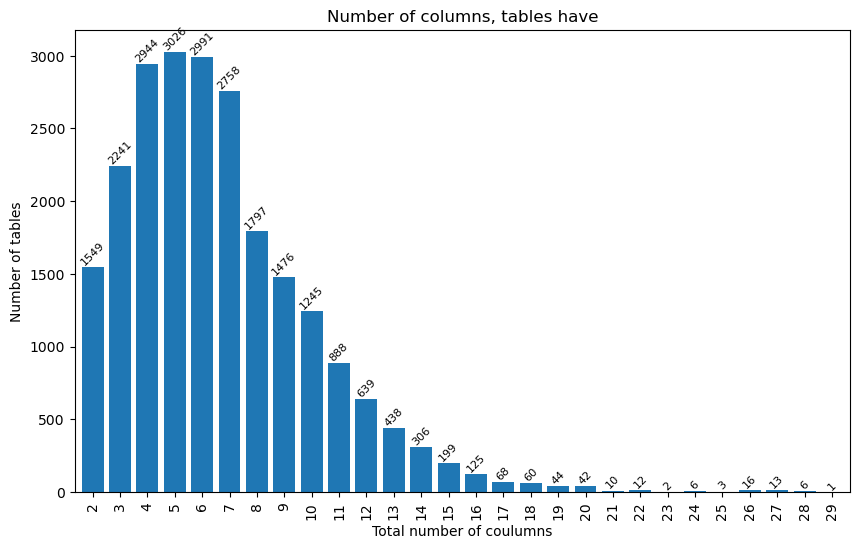

In [16]:
# setting a figure size
plt.figure(figsize=(10, 6))

# plotting the bar chart
ax = value_counts.plot(kind='bar', width=0.8)

# settting the labels and title
plt.xlabel('Total number of coulumns')
plt.ylabel('Number of tables')
plt.title('Number of columns, tables have')

# Add count values on top of each bar
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', rotation=45, fontsize=8)

# displaying the chart
plt.show()

# # Print the value counts
# print("Value Counts:")
# print(value_counts)

In [17]:
# Create a sample with labels which occures atleast 2 or 3 times

# Make a groupby with the specific column --> here it is label
grouped = df_train.groupby('label')
grouped

In [18]:
# Capturing specific raws which can be processed on the machine

df_train_5 = grouped.apply(lambda x: x.sample(n=3))
df_train_5 = df_train_5.reset_index(drop=True)

In [19]:
df_train_5.head()

,table_name,main_column_index,column_index,label
0,Place_officerentinfo.pl_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address
1,Restaurant_lbb.in_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address
2,Restaurant_whereleb.com_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address
3,MusicRecording_bradengates.com_September2020_C...,0,2,https://dbpedia.org/ontology/album
4,MusicRecording_ingowanring.com_September2020_C...,0,3,https://dbpedia.org/ontology/album


In [20]:
# preparing the input file for the ML purpose

# Path to the folder where the tables are stored

folder_path = 'dataset/Round2-SOTAB-CPA-Tables/Round2-SOTAB-CPA-Tables/'

# A column 'data_value' will work as a input dataset to our model
df_train_5['main_column_value'] = None
df_train_5['other_column_value'] = None


# Iterate over each row in the dataframe
for index, row in df_train_5.iterrows():
    table_name = row['table_name']
    main_column_name = row['main_column_index']
    other_column_name = row['column_index']
    
    # Check if the table file exists in the folder
    table_file_path = os.path.join(folder_path, table_name)  # Assuming the tables are stored as CSV files
    
    if os.path.isfile(table_file_path):
        # Load the table file into a dataframe
        table_df = pd.read_json(table_file_path, lines=True, compression='gzip')
        
        # Check if the column exists in the table dataframe
        if main_column_name in table_df.columns and other_column_name in table_df.columns:
            # Fetch the column data
            other_column_data = table_df[other_column_name]
            main_column_data = table_df[main_column_name]
            
            # Assign the column data to the 'data_value' column in the original dataframe
            df_train_5.at[index, 'main_column_value'] = main_column_data.tolist()
            df_train_5.at[index, 'other_column_value'] = other_column_data.tolist()

        else:
            print(f"Column '{other_column_name}' and '{main_column_name}'does not exist in table '{table_name}'.")
    else:
        print(f"Table '{table_name}' does not exist in the folder.")

In [21]:
df_train_5.head()

,table_name,main_column_index,column_index,label,main_column_value,other_column_value
0,Place_officerentinfo.pl_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address,"[Oxygen Park Phase I, Textorial Park A, New Ci...","[Poland, Szczecin, al. Wyzwolenia/ ul. J. Malc..."
1,Restaurant_lbb.in_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address,[Malvan Tadka: A Great Place To Try Authentic ...,"[Building 38, House 501, Eastern Express Highw..."
2,Restaurant_whereleb.com_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address,"[Le Roof du Bristol, Pizzaro, KB Doner, Caribo...","[Bristol Hotel, Hamra, Beirut, Lebanon, City C..."
3,MusicRecording_bradengates.com_September2020_C...,0,2,https://dbpedia.org/ontology/album,[with a little help from my friends - lennon/m...,"[song facilitator, much rather be sleeping, li..."
4,MusicRecording_ingowanring.com_September2020_C...,0,3,https://dbpedia.org/ontology/album,"[Dream, Attics of My Life, The Half-Lumined Pa...","[B'ee's Pent Pouch, Visions of Shadows that Sh..."


In [22]:
df_train_5.columns

Index(['table_name', 'main_column_index', 'column_index', 'label',
       'main_column_value', 'other_column_value'],
      dtype='object')

In [23]:
df_train_5_explod = df_train_5.explode('main_column_value')
# df_train_5_explod = df_train_5.explode('main_column_value', ignore_index=True).apply(pd.Series.explode)

In [24]:
df_train_5_explod

,table_name,main_column_index,column_index,label,main_column_value,other_column_value
0,Place_officerentinfo.pl_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address,Oxygen Park Phase I,"[Poland, Szczecin, al. Wyzwolenia/ ul. J. Malc..."
0,Place_officerentinfo.pl_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address,Textorial Park A,"[Poland, Szczecin, al. Wyzwolenia/ ul. J. Malc..."
0,Place_officerentinfo.pl_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address,New City Mokotow,"[Poland, Szczecin, al. Wyzwolenia/ ul. J. Malc..."
0,Place_officerentinfo.pl_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address,Piano House,"[Poland, Szczecin, al. Wyzwolenia/ ul. J. Malc..."
0,Place_officerentinfo.pl_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address,Malta House,"[Poland, Szczecin, al. Wyzwolenia/ ul. J. Malc..."
...,...,...,...,...,...,...
146,Product_ozonekites.com.au_September2020_CPA.js...,0,7,https://dbpedia.org/ontology/weight,Ozone Connect Water Harness,"[None, None, None, None, 4.0 kg, 4.0 kg, 4.0 k..."
146,Product_ozonekites.com.au_September2020_CPA.js...,0,7,https://dbpedia.org/ontology/weight,Ozone Contact Bar Water V4 (No Lines),"[None, None, None, None, 4.0 kg, 4.0 kg, 4.0 k..."
146,Product_ozonekites.com.au_September2020_CPA.js...,0,7,https://dbpedia.org/ontology/weight,Ozone Backpack,"[None, None, None, None, 4.0 kg, 4.0 kg, 4.0 k..."
146,Product_ozonekites.com.au_September2020_CPA.js...,0,7,https://dbpedia.org/ontology/weight,Ozone R1 V4 Kite Only,"[None, None, None, None, 4.0 kg, 4.0 kg, 4.0 k..."


In [25]:
df_train_5_explod['other_column_value'] = df_train_5['other_column_value'].explode()

In [26]:
df_train_5_explod = df_train_5_explod.reset_index(drop=True)
df_train_5_explod

,table_name,main_column_index,column_index,label,main_column_value,other_column_value
0,Place_officerentinfo.pl_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address,Oxygen Park Phase I,"Poland, Szczecin, al. Wyzwolenia/ ul. J. Malcz..."
1,Place_officerentinfo.pl_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address,Textorial Park A,"Poland, Lodz, Fabryczna 17"
2,Place_officerentinfo.pl_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address,New City Mokotow,"02-674 Poland, Warsaw, Mokotow, Marynarska 15"
3,Place_officerentinfo.pl_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address,Piano House,"Poland, Gdansk, Strzyża, Szymanowskiego 12/16"
4,Place_officerentinfo.pl_September2020_CPA.json.gz,0,1,https://dbpedia.org/ontology/address,Malta House,"Poland, Poznan, Nowe Miasto, Baraniaka"
...,...,...,...,...,...,...
30605,Product_ozonekites.com.au_September2020_CPA.js...,0,7,https://dbpedia.org/ontology/weight,Ozone Connect Water Harness,None
30606,Product_ozonekites.com.au_September2020_CPA.js...,0,7,https://dbpedia.org/ontology/weight,Ozone Contact Bar Water V4 (No Lines),None
30607,Product_ozonekites.com.au_September2020_CPA.js...,0,7,https://dbpedia.org/ontology/weight,Ozone Backpack,None
30608,Product_ozonekites.com.au_September2020_CPA.js...,0,7,https://dbpedia.org/ontology/weight,Ozone R1 V4 Kite Only,None


In [27]:
df_train_5_explod_ml = df_train_5_explod[['main_column_value','other_column_value','label']]
df_train_5_explod_ml.head()

,main_column_value,other_column_value,label
0,Oxygen Park Phase I,"Poland, Szczecin, al. Wyzwolenia/ ul. J. Malcz...",https://dbpedia.org/ontology/address
1,Textorial Park A,"Poland, Lodz, Fabryczna 17",https://dbpedia.org/ontology/address
2,New City Mokotow,"02-674 Poland, Warsaw, Mokotow, Marynarska 15",https://dbpedia.org/ontology/address
3,Piano House,"Poland, Gdansk, Strzyża, Szymanowskiego 12/16",https://dbpedia.org/ontology/address
4,Malta House,"Poland, Poznan, Nowe Miasto, Baraniaka",https://dbpedia.org/ontology/address


In [28]:
df_train_5_explod_ml['main_column_value'] = df_train_5_explod_ml['main_column_value'].astype(str)
df_train_5_explod_ml['other_column_value'] = df_train_5_explod_ml['other_column_value'].astype(str)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17584\1972517104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_5_explod_ml['main_column_value'] = df_train_5_explod_ml['main_column_value'].astype(str)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17584\1972517104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_5_explod_ml['other_column_value'] = df_train_5_explod_ml['other_column_value'].astype(str)


### ML implementation

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.sparse import hstack

In [30]:
df_train_5_explod_ml['label'].nunique()

49

In [31]:
unique_labels = df_train_5_explod_ml['label'].unique()
print(unique_labels)

['https://dbpedia.org/ontology/address'
 'https://dbpedia.org/ontology/album'
 'https://dbpedia.org/ontology/albumRuntime'
 'https://dbpedia.org/ontology/artist'
 'https://dbpedia.org/ontology/author'
 'https://dbpedia.org/ontology/birthDate'
 'https://dbpedia.org/ontology/birthPlace'
 'https://dbpedia.org/ontology/brand'
 'https://dbpedia.org/ontology/category'
 'https://dbpedia.org/ontology/city' 'https://dbpedia.org/ontology/colour'
 'https://dbpedia.org/ontology/country'
 'https://dbpedia.org/ontology/cuisine'
 'https://dbpedia.org/ontology/currency'
 'https://dbpedia.org/ontology/day'
 'https://dbpedia.org/ontology/deathDate'
 'https://dbpedia.org/ontology/description'
 'https://dbpedia.org/ontology/director'
 'https://dbpedia.org/ontology/employer'
 'https://dbpedia.org/ontology/endDateTime'
 'https://dbpedia.org/ontology/episodeNumber'
 'https://dbpedia.org/ontology/format'
 'https://dbpedia.org/ontology/gender'
 'https://dbpedia.org/ontology/genre' 'https://dbpedia.org/ontology

In [32]:
# Split the dataset into training and testing datasets
X = df_train_5_explod_ml[['main_column_value', 'other_column_value']]
y = df_train_5_explod_ml['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df_train_5_explod_ml['label'], random_state=42)


In [33]:
# Feature extraction
vectorizer = TfidfVectorizer()
X_train_main = vectorizer.fit_transform(X_train['main_column_value'])
X_train_other = vectorizer.transform(X_train['other_column_value'])

X_test_main = vectorizer.transform(X_test['main_column_value'])
X_test_other = vectorizer.transform(X_test['other_column_value'])

# X_test_test_main = vectorizer.transform([str(x).lower() for x in X_test_test['main_column_value']])
# X_test_test_other = vectorizer.transform([str(x).lower() for x in X_test_test['other_column_value']])

# Concatenate the sparse matrices directly
# X_test_test_vectorized = hstack([X_test_test_main, X_test_test_other])

X_train_vectorized = hstack([X_train_main, X_train_other])
X_test_vectorized = hstack([X_test_main, X_test_other])

In [34]:
print(X_train_vectorized.shape)
print(X_test_vectorized.shape)

(24488, 54060)
(6122, 54060)


In [35]:
X_train_vectorized[15]

<1x54060 sparse matrix of type '<class 'numpy.float64'>'
	with 58 stored elements in Compressed Sparse Row format>

In [36]:
# Create a logistic regression model
model = LogisticRegression()

In [37]:
# X_train_vectorized[1]

In [38]:
print(X_train_vectorized.shape)

(24488, 54060)


In [39]:
# Train the model on the training data
model.fit(X_train_vectorized, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
# Model evaluation
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9029728846782097


In [43]:
# Calculate precision, recall, and F1 score
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision_macro}")
print(f"Recall: {recall_macro}")
print(f"F1 score: {f1_macro}")

Precision: 0.9294940504583653
Recall: 0.7773848418180519
F1 score: 0.8312921499677736


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
report = classification_report(y_test, y_pred)
print(report)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                precision    recall  f1-score   support

          https://dbpedia.org/ontology/address       1.00      0.96      0.98        98
            https://dbpedia.org/ontology/album       1.00      0.73      0.84        26
     https://dbpedia.org/ontology/albumRuntime       0.00      0.00      0.00        17
           https://dbpedia.org/ontology/artist       1.00      0.44      0.61        16
           https://dbpedia.org/ontology/author       0.95      0.42      0.58        43
        https://dbpedia.org/ontology/birthDate       1.00      0.69      0.82        71
       https://dbpedia.org/ontology/birthPlace       0.51      0.87      0.64       110
            https://dbpedia.org/ontology/brand       1.00      0.91      0.95        32
         https://dbpedia.org/ontology/category       1.00      0.79      0.88        29
             https://dbpedia.org/ontology/city       1.00      0.84      0.91        67
           https://dbpedia.org/

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Preparing the submission files for the competition

In [47]:
df_test_4 = df_test[:]

In [48]:
df_test_4 

,table_name,main_column_index,column_index
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3
1,Book_bccampus.ca_September2020_CPA.json.gz,0,4
2,Book_bccampus.ca_September2020_CPA.json.gz,0,2
3,Book_betweenthecovers.com_September2020_CPA.js...,0,4
4,Book_betweenthecovers.com_September2020_CPA.js...,0,2
...,...,...,...
899,TVEpisode_solarmovie.app_September2020_CPA.jso...,0,1
900,TVEpisode_solarmovie.app_September2020_CPA.jso...,0,3
901,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,3
902,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,1


In [49]:
# preparing the input file for the ML purpose

# Path to the folder where the tables are stored

folder_path = 'dataset/Round2-SOTAB-CPA-Tables/Round2-SOTAB-CPA-Tables/'

# A column 'data_value' will work as a input dataset to our model
df_test_4['main_column_value'] = None
df_test_4['other_column_value'] = None


# Iterate over each row in the dataframe
for index, row in df_test_4.iterrows():
    table_name = row['table_name']
    main_column_name = row['main_column_index']
    other_column_name = row['column_index']
    
    # Check if the table file exists in the folder
    table_file_path = os.path.join(folder_path, table_name)  # Assuming the tables are stored as CSV files
    
    if os.path.isfile(table_file_path):
        # Load the table file into a dataframe
        table_df = pd.read_json(table_file_path, lines=True, compression='gzip')
        
        # Check if the column exists in the table dataframe
        if main_column_name in table_df.columns and other_column_name in table_df.columns:
            # Fetch the column data
            other_column_data = table_df[other_column_name]
            main_column_data = table_df[main_column_name]
            
            # Assign the column data to the 'data_value' column in the original dataframe
            df_test_4.at[index, 'main_column_value'] = main_column_data.tolist()
            df_test_4.at[index, 'other_column_value'] = other_column_data.tolist()

        else:
            print(f"Column '{other_column_name}' and '{main_column_name}'does not exist in table '{table_name}'.")
    else:
        print(f"Table '{table_name}' does not exist in the folder.")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15240\2975317613.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_4['main_column_value'] = None
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15240\2975317613.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_4['other_column_value'] = None


In [50]:
print(df_test_4.iloc[0,0])
df_test_4

Book_bccampus.ca_September2020_CPA.json.gz


,table_name,main_column_index,column_index,main_column_value,other_column_value
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,[Vital Sign Measurement Across the Lifespan - ...,"[[Posted:, 2018-04-12T09:49:42.230-07:00], [Po..."
1,Book_bccampus.ca_September2020_CPA.json.gz,0,4,[Vital Sign Measurement Across the Lifespan - ...,"[$0.00, $0.00, $0.00, $0.00, $0.00, $0.00, $0...."
2,Book_bccampus.ca_September2020_CPA.json.gz,0,2,[Vital Sign Measurement Across the Lifespan - ...,"[eng, eng, eng, eng, eng, eng, eng, eng, eng, ..."
3,Book_betweenthecovers.com_September2020_CPA.js...,0,4,"[The Dancer from Atlantis, A Christmas Garland...","[USD, USD, USD, USD, USD, USD, USD, USD, USD, ..."
4,Book_betweenthecovers.com_September2020_CPA.js...,0,2,"[The Dancer from Atlantis, A Christmas Garland...","[Nelson Doubleday Inc,, (Prairie Press),, Alfr..."
...,...,...,...,...,...
899,TVEpisode_solarmovie.app_September2020_CPA.jso...,0,1,"[Salva El Tigre, Pimemento, Jim Carrey, Chapte...","[While celebrating his 40th birthday, Félix wo..."
900,TVEpisode_solarmovie.app_September2020_CPA.jso...,0,3,"[Salva El Tigre, Pimemento, Jim Carrey, Chapte...","[Narcos: Mexico, Brooklyn Nine-Nine, Lights Ou..."
901,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,3,"[Veal with Chef Rene Rodriguez, A King Who Lik...","[3, 10, 4, 9, 2, 1, 3, 1, 6, 4, 2, 1, 7, 3, 2,..."
902,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,1,"[Veal with Chef Rene Rodriguez, A King Who Lik...",[Chef Rene Rodriguez makes mouth-watering porc...


In [51]:
# # Read a sample file and sources residing in it : File name and data residing in it. 
# file_path_gz = 'dataset/Round2-SOTAB-CTA-Tables/CreativeWork_2agenten.com_September2020_CTA.json.gz'  # Replace with the actual file path of your JSON file
# df = pd.read_json(file_path_gz, lines=True, compression='gzip')

In [52]:
# df_test_4 = df_test_4.explode('main_column_value')
df_test_4_explod = df_test_4.explode('main_column_value')

In [53]:
df_test_4_explod

,table_name,main_column_index,column_index,main_column_value,other_column_value
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Vital Sign Measurement Across the Lifespan - 1...,"[[Posted:, 2018-04-12T09:49:42.230-07:00], [Po..."
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,BC Reads: Adult Literacy Fundamental English -...,"[[Posted:, 2018-04-12T09:49:42.230-07:00], [Po..."
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Provisional Prosthodontic series - 2nd Edition,"[[Posted:, 2018-04-12T09:49:42.230-07:00], [Po..."
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Introduction to Psychology - 1st Canadian Edition,"[[Posted:, 2018-04-12T09:49:42.230-07:00], [Po..."
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,BC Reads: Adult Literacy Fundamental English -...,"[[Posted:, 2018-04-12T09:49:42.230-07:00], [Po..."
...,...,...,...,...,...
903,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Australian Spartan,"[Cook Like a Chef, The Wiggles' World, The Lum..."
903,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Camera Wheelbarrow Tiger Pillow,"[Cook Like a Chef, The Wiggles' World, The Lum..."
903,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Spiky Gold Hunters,"[Cook Like a Chef, The Wiggles' World, The Lum..."
903,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,All Eyes on Me,"[Cook Like a Chef, The Wiggles' World, The Lum..."


In [54]:
# df_test_4_explod = df_test_4.explode('other_column_value')

In [55]:
df_test_4_explod['other_column_value'] = df_test_4['other_column_value'].explode()

In [56]:
df_test_4_explod = df_test_4_explod.reset_index(drop=True)
df_test_4_explod

,table_name,main_column_index,column_index,main_column_value,other_column_value
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Vital Sign Measurement Across the Lifespan - 1...,"[Posted:, 2018-04-12T09:49:42.230-07:00]"
1,Book_bccampus.ca_September2020_CPA.json.gz,0,3,BC Reads: Adult Literacy Fundamental English -...,"[Posted:, 2015-10-29T14:31:06.827-07:00]"
2,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Provisional Prosthodontic series - 2nd Edition,"[2018-05-17T08:46:10.710-07:00, Posted:]"
3,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Introduction to Psychology - 1st Canadian Edition,"[2014-10-16T15:56:26.847-07:00, Posted:]"
4,Book_bccampus.ca_September2020_CPA.json.gz,0,3,BC Reads: Adult Literacy Fundamental English -...,"[Posted:, 2015-11-02T13:57:41.977-08:00]"
...,...,...,...,...,...
385533,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Australian Spartan,Spartan
385534,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Camera Wheelbarrow Tiger Pillow,Watch Emergence
385535,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Spiky Gold Hunters,Watch Spiky Gold Hunters
385536,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,All Eyes on Me,Colonial Combat


In [57]:
## Letter on please look into in detail and try to figure out the problem with the null values

# Count the NaN values in each column
nan_count_column = df_test_4_explod.isna().sum()
print(nan_count_column)

table_name                0
main_column_index         0
column_index              0
main_column_value       268
other_column_value    30056
dtype: int64


In [58]:
# X_test_test = df_test_4_explod['other_column_value']

X_test_test = df_test_4_explod[['main_column_value', 'other_column_value']]

print(type(X_test_test))
# print(X_test_test[1])

<class 'pandas.core.frame.DataFrame'>


In [59]:
## Following code was giving a memory error henceforth we have used """hstack from scipy to solve the problem"""

# X_test_test_main = vectorizer.transform([str(x).lower() for x in X_test_test['main_column_value']])
# X_test_test_other = vectorizer.transform([str(x).lower() for x in X_test_test['other_column_value']])

# # Fit the vectorizer on the training data and transform the training and testing data
# # X_test_test_vec = vectorizer.transform(X_test_test)
# # X_test_test_main = vectorizer.transform(X_test_test['main_column_value'])
# # X_test_test_other = vectorizer.transform(X_test_test['other_column_value'])

# # Concatenate the features
# # X_train_vectorized = pd.concat([pd.DataFrame(X_train_main.toarray()), pd.DataFrame(X_train_other.toarray())], axis=1)
# X_test_test_vectorized = pd.concat([pd.DataFrame(X_test_test_main.toarray()), pd.DataFrame(X_test_test_other.toarray())], axis=1)

In [60]:
X_test_test_main = vectorizer.transform([str(x).lower() for x in X_test_test['main_column_value']])
X_test_test_other = vectorizer.transform([str(x).lower() for x in X_test_test['other_column_value']])

# Concatenate the sparse matrices directly
X_test_test_vectorized = hstack([X_test_test_main, X_test_test_other])


In [61]:
print(X_test_test_vectorized.shape)
print(X_train_vectorized.shape)

(385538, 40040)
(20918, 40040)


In [62]:
# Make predictions on the test_test data
y_pred_test = model.predict(X_test_test_vectorized)

In [63]:
print(y_pred_test.shape)
print(type(y_pred_test))

(385538,)
<class 'numpy.ndarray'>


In [67]:
# Convert the NumPy array to a DataFrame
y_pred_test_df = pd.DataFrame({'label': y_pred_test})

# Concatenate the original DataFrame and the array DataFrame along the column axis
PAAV_DBP_R2CPA = pd.concat([df_test_4_explod, y_pred_test_df], axis=1)

In [68]:
PAAV_DBP_R2CPA 

,table_name,main_column_index,column_index,main_column_value,other_column_value,label
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Vital Sign Measurement Across the Lifespan - 1...,"[Posted:, 2018-04-12T09:49:42.230-07:00]",https://dbpedia.org/ontology/releaseDate
1,Book_bccampus.ca_September2020_CPA.json.gz,0,3,BC Reads: Adult Literacy Fundamental English -...,"[Posted:, 2015-10-29T14:31:06.827-07:00]",https://dbpedia.org/ontology/birthDate
2,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Provisional Prosthodontic series - 2nd Edition,"[2018-05-17T08:46:10.710-07:00, Posted:]",https://dbpedia.org/ontology/birthDate
3,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Introduction to Psychology - 1st Canadian Edition,"[2014-10-16T15:56:26.847-07:00, Posted:]",https://dbpedia.org/ontology/birthDate
4,Book_bccampus.ca_September2020_CPA.json.gz,0,3,BC Reads: Adult Literacy Fundamental English -...,"[Posted:, 2015-11-02T13:57:41.977-08:00]",https://dbpedia.org/ontology/time
...,...,...,...,...,...,...
385533,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Australian Spartan,Spartan,https://dbpedia.org/ontology/birthPlace
385534,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Camera Wheelbarrow Tiger Pillow,Watch Emergence,https://dbpedia.org/ontology/birthPlace
385535,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Spiky Gold Hunters,Watch Spiky Gold Hunters,https://dbpedia.org/ontology/material
385536,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,All Eyes on Me,Colonial Combat,https://dbpedia.org/ontology/artist


In [73]:
PAAV_DBP_R2CPA_SUB = PAAV_DBP_R2CPA[['table_name','main_column_index','column_index', 'label']]
PAAV_DBP_R2CPA_SUB

,table_name,main_column_index,column_index,label
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,https://dbpedia.org/ontology/releaseDate
1,Book_bccampus.ca_September2020_CPA.json.gz,0,3,https://dbpedia.org/ontology/birthDate
2,Book_bccampus.ca_September2020_CPA.json.gz,0,3,https://dbpedia.org/ontology/birthDate
3,Book_bccampus.ca_September2020_CPA.json.gz,0,3,https://dbpedia.org/ontology/birthDate
4,Book_bccampus.ca_September2020_CPA.json.gz,0,3,https://dbpedia.org/ontology/time
...,...,...,...,...
385533,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,https://dbpedia.org/ontology/birthPlace
385534,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,https://dbpedia.org/ontology/birthPlace
385535,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,https://dbpedia.org/ontology/material
385536,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,https://dbpedia.org/ontology/artist


In [74]:
# Group by 'table_name' and 'column_index', and find the label that occurred the maximum times
PAAV_DBP_R2CPA_SUB = PAAV_DBP_R2CPA_SUB.groupby(['table_name', 'main_column_index', 'column_index'])['label'].apply(lambda x: x.value_counts().idxmax()).reset_index()

In [75]:
PAAV_DBP_R2CPA_SUB.head()

,table_name,main_column_index,column_index,label
0,Book_bccampus.ca_September2020_CPA.json.gz,0,2,https://dbpedia.org/ontology/starring
1,Book_bccampus.ca_September2020_CPA.json.gz,0,3,https://dbpedia.org/ontology/time
2,Book_bccampus.ca_September2020_CPA.json.gz,0,4,https://dbpedia.org/ontology/time
3,Book_betweenthecovers.com_September2020_CPA.js...,0,2,https://dbpedia.org/ontology/starring
4,Book_betweenthecovers.com_September2020_CPA.js...,0,3,https://dbpedia.org/ontology/starring


In [76]:
# Get the unique values of the column in both DataFrames
unique_values_df_test = set(df_test['table_name'])
unique_values_PAAV_DBP_R2CPA_SUB = set(PAAV_DBP_R2CPA_SUB['table_name'])

# Check if the unique values are the same
if unique_values_df_test == unique_values_PAAV_DBP_R2CPA_SUB:
    print("The DataFrames have the same set of values in the 'table_name' column.")
else:
    print("The DataFrames do not have the same set of values in the 'table_name' column.")
    
    
# Checking the shape of the file 
print(f"The shpae of the generated file is :{PAAV_DBP_R2CPA_SUB.shape} ")    

The DataFrames have the same set of values in the 'table_name' column.
The shpae of the generated file is :(904, 4) 


In [78]:
# Save the DataFrame as a CSV file
PAAV_DBP_R2CPA_SUB.to_csv('DREIFLUSS_sotab_cpa_test_targets_round2_dbpedia_R2-SOTAB-CPA-DBP.csv', index=False)